#### Import required packages  


24-nov
    - t-SNE followed by spectral clustering



<a name='toc'></a>  TOC

* <a href='#me.01.t1'> Modeling and Evaluation 1</a> :
            Train and adjust parameters  
            
  - <a href='#t-sne'> t-SNE</a>
  - <a href='#end_of_file'> end of file</a>


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
import warnings
warnings.simplefilter('ignore',DeprecationWarning)
import seaborn as sns
import time
import copy

from pylab import rcParams
#import hdbscan

from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler

#from sklearn.datasets import make_blobs

from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score

from sklearn import metrics
from sklearn import metrics as mt
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import confusion_matrix as conf
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score

from sklearn.cluster import KMeans

from tabulate import tabulate

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from __future__ import print_function

#### Read in cleaned  dataset from .csv file  

In [59]:
data_dir = '../data/'
data_file = 'mashable_clean_dataset_for_lab_03.csv'

file_2_read = data_dir + data_file
df = pd.read_csv(file_2_read)

df_cluster = copy.deepcopy(df)


In [ ]:
col_names = df_cluster.columns.values.tolist()
col_names

['n_tokens_title',
 'num_keywords',
 'data_channel_is_lifestyle',
 'data_channel_is_entertainment',
 'data_channel_is_socmed',
 'kw_avg_max',
 'is_weekend',
 'global_subjectivity',
 'global_rate_positive_words',
 'rate_positive_words',
 'max_positive_polarity',
 'min_negative_polarity',
 'max_negative_polarity',
 'title_sentiment_polarity',
 'abs_title_subjectivity',
 'ln_n_tokens_content',
 'ln_num_hrefs',
 'ln_num_imgs',
 'ln_num_videos',
 'ln_kw_min_min',
 'ln_kw_avg_min',
 'ln_kw_min_max',
 'ln_kw_avg_avg',
 'ln_self_reference_avg_sharess',
 'ln_LDA_00',
 'ln_LDA_01',
 'ln_LDA_02',
 'ln_LDA_03',
 'ln_LDA_04',
 'ln_global_rate_negative_words',
 'ln_min_positive_polarity',
 'ln_abs_title_sentiment_polarity',
 'ln_shares']

<a href='#toc'> Table of Contents</a>

<a name='t-sne'></a>
<font color="blue" size=3> t-SNE

### t-SNE  


13875

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 13875 samples in 0.031s...
[t-SNE] Computed neighbors for 13875 samples in 16.928s...
[t-SNE] Computed conditional probabilities for sample 1000 / 13875
[t-SNE] Computed conditional probabilities for sample 2000 / 13875
[t-SNE] Computed conditional probabilities for sample 3000 / 13875
[t-SNE] Computed conditional probabilities for sample 4000 / 13875
[t-SNE] Computed conditional probabilities for sample 5000 / 13875
[t-SNE] Computed conditional probabilities for sample 6000 / 13875
[t-SNE] Computed conditional probabilities for sample 7000 / 13875
[t-SNE] Computed conditional probabilities for sample 8000 / 13875
[t-SNE] Computed conditional probabilities for sample 9000 / 13875
[t-SNE] Computed conditional probabilities for sample 10000 / 13875
[t-SNE] Computed conditional probabilities for sample 11000 / 13875
[t-SNE] Computed conditional probabilities for sample 12000 / 13875
[t-SNE] Computed conditional probabilities for sa

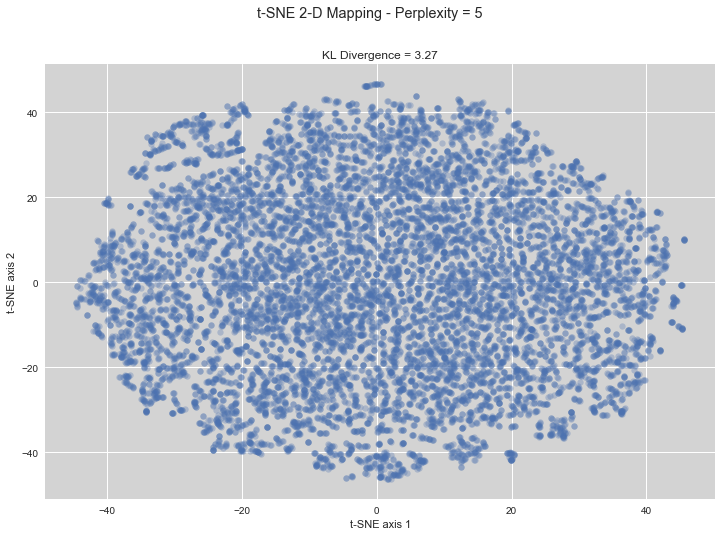

../data/t_sne_mapping_perplex_0005.csv
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 13875 samples in 0.031s...
[t-SNE] Computed neighbors for 13875 samples in 17.079s...
[t-SNE] Computed conditional probabilities for sample 1000 / 13875
[t-SNE] Computed conditional probabilities for sample 2000 / 13875
[t-SNE] Computed conditional probabilities for sample 3000 / 13875
[t-SNE] Computed conditional probabilities for sample 4000 / 13875
[t-SNE] Computed conditional probabilities for sample 5000 / 13875
[t-SNE] Computed conditional probabilities for sample 6000 / 13875
[t-SNE] Computed conditional probabilities for sample 7000 / 13875
[t-SNE] Computed conditional probabilities for sample 8000 / 13875
[t-SNE] Computed conditional probabilities for sample 9000 / 13875
[t-SNE] Computed conditional probabilities for sample 10000 / 13875
[t-SNE] Computed conditional probabilities for sample 11000 / 13875
[t-SNE] Computed conditional probabilities for sample 12000 / 13875
[t-SNE] Co

In [ ]:
from sklearn.manifold import TSNE

X1 = df_cluster
X1 = X1.sample(frac = 0.35)

# ... save indexes from original dataframe for later re-joins

X1_index = list(X1.index.values)
len(X1_index)

df_out = pd.DataFrame(columns = ['x-tsne', 'y-tsne'])
df_out['sample_index'] = X1_index

for perplex in [5, 10, 20, 50, 75, 100, 200, 400, 1000] :

    tic = time.clock()

    tsne = TSNE(n_components = 2, verbose = 1, perplexity = perplex, n_iter = 500)

    tsne_results = tsne.fit_transform(X1)
    tsne_kl_diverge = tsne.kl_divergence_

    toc = time.clock()
    print (toc - tic)

    _ = plt.figure(figsize = (12, 8))
    _ = plt.subplot(111, facecolor = 'lightgrey')
    
    _ = plt.scatter(tsne_results[:, 0], tsne_results[:, 1],
                 s = 40,
                 linewidths = 0,
                 alpha = 0.30)
    
    _ = plt.xlabel('t-SNE axis 1')
    _ = plt.ylabel('t-SNE axis 2')
        
    _ = plt.suptitle("t-SNE 2-D Mapping - Perplexity = %d" %perplex)
    _ = plt.title("KL Divergence = %.2f" %tsne_kl_diverge)
    _ = plt.grid(True)
    
    plt.savefig("perplex_%04d.png" %perplex)

    plt.show();
    
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ... store in ../data/ directory
# ... write as .csv file for future recall
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

    df_out['x-tsne'] = tsne_results[:,0];
    df_out['y-tsne'] = tsne_results[:,1];

    data_dir = '../data/'
    data_file_base = "t_sne_mapping_perplex_"
    data_file_num = "%04d" %perplex
    data_file_ext = ".csv"
    file_2_write = data_dir + data_file_base + data_file_num + data_file_ext
    
    print(file_2_write)

    df_out.to_csv(file_2_write, index = False)


<a href='#toc'> Table of Contents</a>

<a name='end_of_file'></a>
<font color="blue" size=3>  end of file